## Work
1. 試比較 save_best_only 與否的差異
2. 請僅存入將 save_weights_only 設定為 True, 並嘗試 reset ipynb 並將模型與權重重新建回並預測 x_test

In [0]:
import os
import keras

# Disable GPU
#os.environ["CUDA_VISIBLE_DEVICES"] = ""

In [0]:
train, test = keras.datasets.cifar10.load_data()

In [0]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [0]:
train_x, train_y = train
test_x, test_y = test

# Preproc the inputs
train_x = preproc_x(train_x)
test_x = preproc_x(test_x)

# Preprc the outputs
train_y = preproc_y(train_y)
test_y = preproc_y(test_y)

In [0]:

from keras.layers import BatchNormalization

"""
建立神經網路，並加入 BN layer
"""
def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128]):
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1))(input_layer)
            x = BatchNormalization()(x)
        else:
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1))(x)
            x = BatchNormalization()(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [0]:
"""Code Here
設定超參數
"""
LEARNING_RATE = 1e-3
epochs = 50
batch_size = 1024
MOMENTUM = 0.95

optimizer = keras.optimizers.SGD(lr=LEARNING_RATE, nesterov=True, momentum=MOMENTUM)


In [13]:
# 載入 Callbacks
"""Code Here
設定 callbacks: model checkpoint
"""

from keras.callbacks import ModelCheckpoint

model_ckpt = ModelCheckpoint(filepath="./day86hw_tmp.h5", 
                             monitor="val_loss", 
                             save_best_only=True)

"""Code Here
撰寫你的訓練流程並將結果用 dictionary 紀錄
"""

model = build_mlp(train_x.shape[1:])
model.compile(optimizer = optimizer, loss = "categorical_crossentropy", metrics = ['accuracy'])
model.summary()

history = model.fit(train_x, train_y, batch_size = batch_size, epochs = epochs, shuffle = True, validation_data = [test_x, test_y], callbacks = [model_ckpt])

model = keras.models.load_model('./day86hw_tmp.h5')
loss_loadback, acc_loadback = model.evaluate(test_x, test_y)

W0803 15:51:33.707802 139821331498880 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0803 15:51:33.713341 139821331498880 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0803 15:51:33.717598 139821331498880 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0803 15:51:33.808127 139821331498880 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:133: The name tf.placeholder_with_default is deprecated. Please use tf.compat.v1.placeholder_with_default instead.

W0803 15:51:34.095006 

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
batch_normalization_1 (Batch (None, 512)               2048      
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
batch_normalization_2 (Batch (None, 256)               1024      
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
batch_normalization_3 (Batch (None, 128)               512       
__________

In [14]:
# 載入 Callbacks
"""Code Here
設定 callbacks: model checkpoint
"""

from keras.callbacks import ModelCheckpoint

model_ckpt2 = ModelCheckpoint(filepath="./day86hw_tmp.h5", 
                             monitor="val_loss", 
                             save_best_only=False)

"""Code Here
撰寫你的訓練流程並將結果用 dictionary 紀錄
"""

model = build_mlp(train_x.shape[1:])
model.compile(optimizer = optimizer, loss = "categorical_crossentropy", metrics = ['accuracy'])
model.summary()

history2 = model.fit(train_x, train_y, batch_size = batch_size, epochs = epochs, shuffle = True, validation_data = [test_x, test_y], callbacks = [model_ckpt2])

model = keras.models.load_model('./day86hw_tmp.h5')
loss_loadback2, acc_loadback2 = model.evaluate(test_x, test_y)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
batch_normalization_4 (Batch (None, 512)               2048      
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
batch_normalization_5 (Batch (None, 256)               1024      
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
batch_normalization_6 (Batch (None, 128)               512       
__________

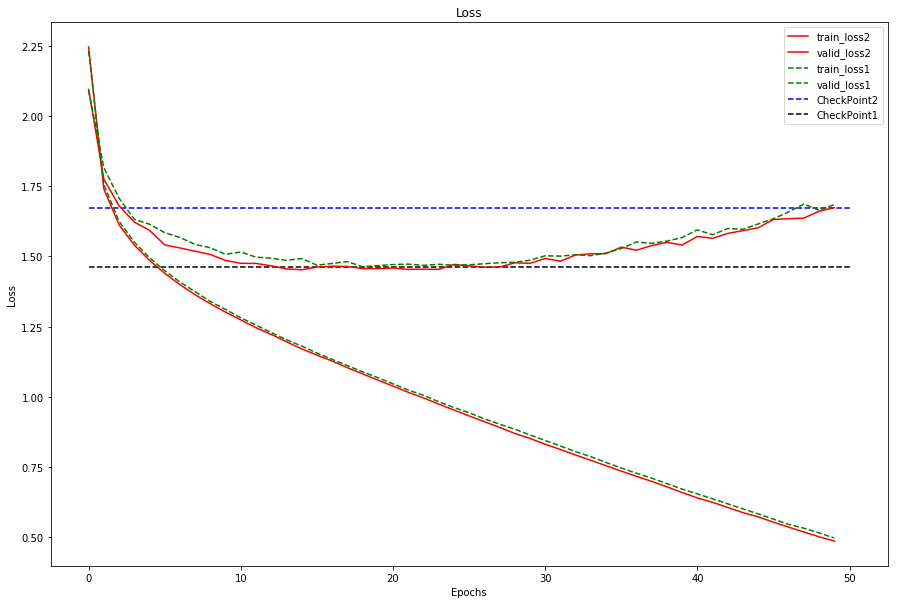

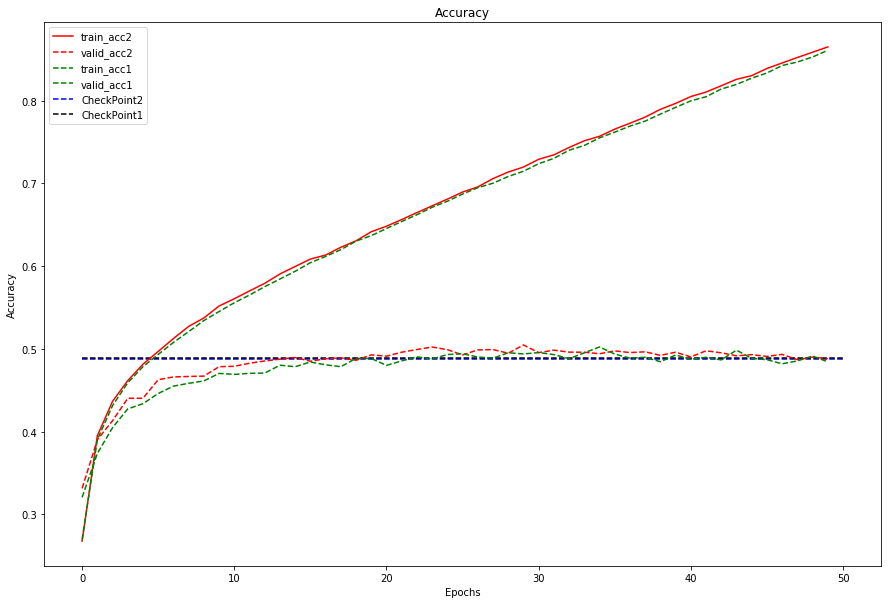

In [15]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(15,10))
plt.plot(history2.history['loss'], '-', label = 'train_loss2', color = 'r')
plt.plot(history2.history['val_loss'], '-', label = 'valid_loss2', color = 'r')
plt.plot(history.history['loss'],'--',label = 'train_loss1', color = 'g')
plt.plot(history.history['val_loss'],'--',label = 'valid_loss1', color = 'g')
plt.hlines(y = loss_loadback2, xmin = 0, xmax = epochs, label = 'CheckPoint2', color = 'b', linestyles = '--')
plt.hlines(y = loss_loadback, xmin = 0, xmax = epochs, label = 'CheckPoint1', color = 'black', linestyles = '--')
plt.title('Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

plt.figure(figsize=(15,10))
plt.plot(history2.history['acc'], '-', label = 'train_acc2', color = 'r')
plt.plot(history2.history['val_acc'], '--', label = 'valid_acc2', color = 'r')
plt.plot(history.history['acc'],'--',label = 'train_acc1', color = 'g')
plt.plot(history.history['val_acc'],'--',label = 'valid_acc1', color = 'g')
plt.hlines(y = acc_loadback2, xmin = 0, xmax = epochs, label = 'CheckPoint2', color = 'b', linestyles = '--')
plt.hlines(y = acc_loadback, xmin = 0, xmax = epochs, label = 'CheckPoint1', color = 'black', linestyles = '--')
plt.title('Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# **Reset the ipynb**

In [16]:
#Load back
model = keras.models.load_model('./day86hw_tmp.h5')
loss_loadback, acc_loadback = model.evaluate(test_x, test_y)

10000/10000 [==============================] - 1s 97us/step


In [17]:
print(f"validation loss : {loss_loadback}, validation accuracy : {acc_loadback}")

validation loss : 1.6738534748077392, validation accuracy : 0.4881
